# Final Project - Linear Regression
- Eon Sik Jeong<br>
- April 23rd, 2020<br>
- Credit to Dr. Stansbury for ideas of metrics, analysis, code snippets, and sample algorithms that were modified
- Credit to Yahoo Finances & Kaggle for stock datasets
- https://www.kaggle.com/dgawlik/nyse
- https://finance.yahoo.com/


## Import
---

In [37]:
import numpy
import pandas
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read CSV
---

In [38]:
data = pandas.read_csv('stockdata/005930.KS.csv') 
#5 year stock data of Samsung as an example. 
# Use stockdata/^DJI.csv, ^GSPC.csv, or ^IXIC.csv for other datasets such as Daw Jones, NASDAQ, and S&P 500.
data.head() #Display head

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-11,28380,29580,28360,29480,285.887604,21108650
1,2015-03-12,29200,29460,28940,28940,280.650879,19153200
2,2015-03-13,29220,29580,29100,29140,282.590424,9413100
3,2015-03-16,29160,29740,29100,29400,285.111786,8974550
4,2015-03-17,29400,30000,29200,29940,290.348572,13661150


## Refine Data
---

In [39]:
price_high = data['High'].values #high prices
price_low = data['Low'].values #low prices
price_mid = (price_high + price_low) / 2 #Average
date = data['Date'].values

In [40]:
start_date = datetime.date(2015,3,15)
end_date = datetime.date(2020,3,15)

dates = data.index.tolist()
prices = data['Adj Close'].tolist()

dates = numpy.reshape(dates, (len(dates), 1))
prices = numpy.reshape(prices, (len(prices), 1))

## Test

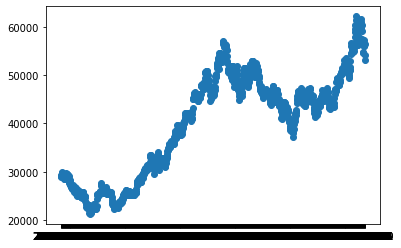

In [41]:
plt.plot(date, price_mid, 'o')
plt.show()

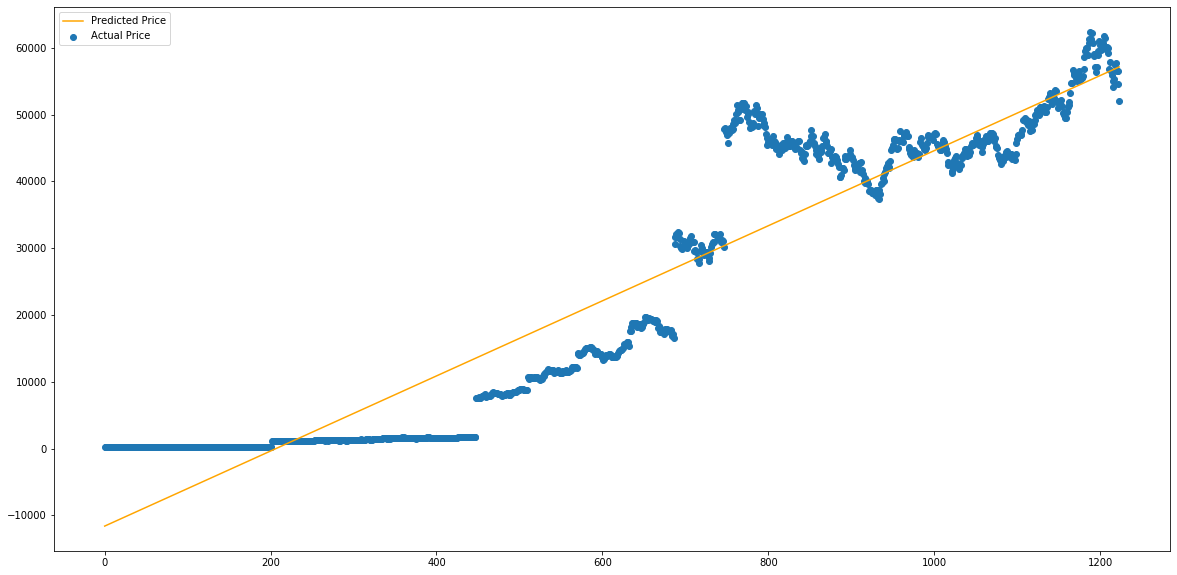

In [42]:
regressor = LinearRegression()
regressor.fit(dates, prices)
 
#Test Results

fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.scatter(dates, prices, label= 'Actual Price') 
plt.plot(dates, regressor.predict(dates), color='orange', label = 'Predicted Price') 
plt.legend()
plt.show()

In [43]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=35)
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Train Set Graph
---

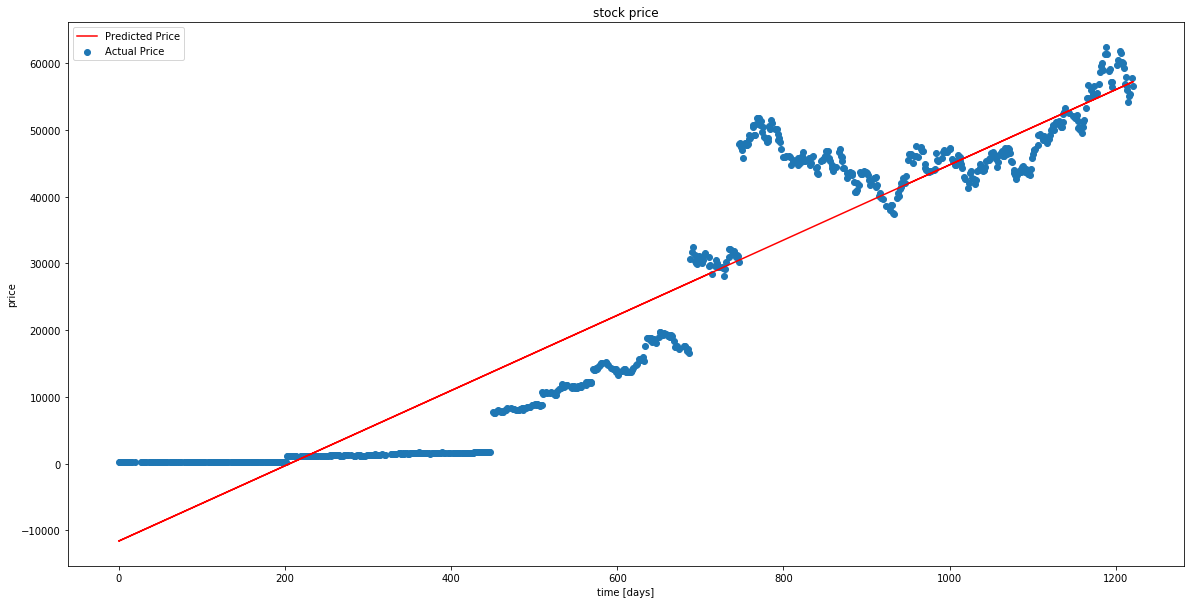

In [44]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.scatter(xtrain, ytrain, label= 'Actual Price') #datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='red', label = 'Predicted Price')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend()
plt.show()

## Test Set Graph
---

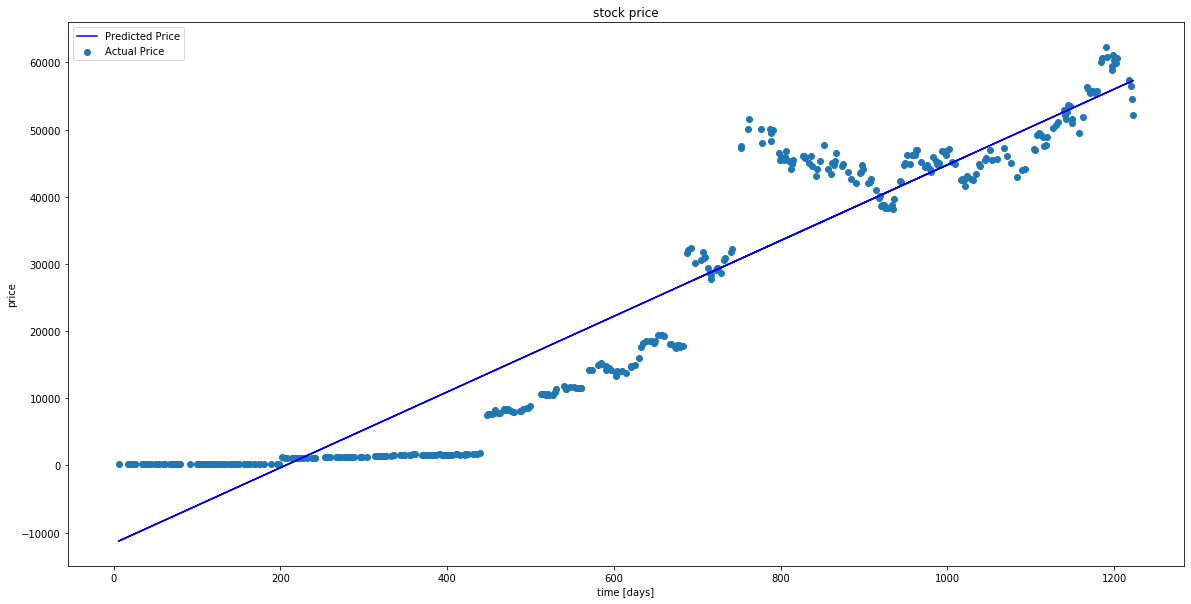

In [46]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.scatter(xtest, ytest, label= 'Actual Price') #datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', label = 'Predicted Price')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend()
plt.show()
#print(predicted)